In [15]:
%matplotlib inline

# Module 10 - Programming Assignment

## Directions

There are general instructions on Blackboard and in the Syllabus for Programming Assignments. This Notebook also has instructions specific to this assignment. Read all the instructions carefully and make sure you understand them. Please ask questions on the discussion boards or email me at `EN605.445@gmail.com` if you do not understand something.

<div style="background: mistyrose; color: firebrick; border: 2px solid darkred; padding: 5px; margin: 10px;">
Please follow the directions and make sure you provide the requested output. Failure to do so may result in a lower grade even if the code is correct or even 0 points.
</div>

You must submit your assignment as `<jhed_id>.ipynb` but DO NOT submit the supplementary files. Thanks!

# The Problem

When we last left our agent in Module 4, it was wandering around a world filled with plains, forests, swamps, hills and mountains. This presupposes a map with known terrain:

```
......
...**.
...***
..^...
..~^..
```

but what if all we know is that we have some area of interest, that we've reduced to a GPS grid:

```
??????
??????
??????
??????
??????
```

and the agent has to determine what kind of terrain is to the left, front and right of it?

Assuming the agent has a very simple visual sensor that constructs a 4x4 grayscale image for each of the three directions, it might it could see something like this:

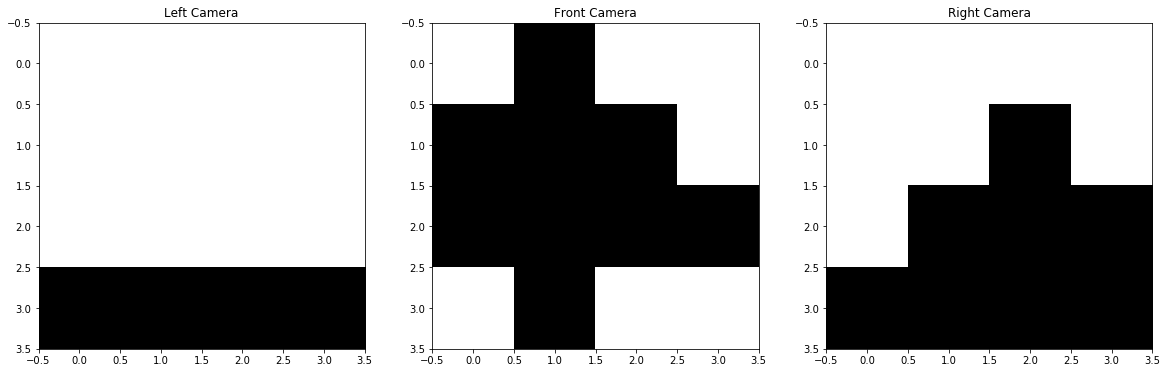

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random

plain =  [0.0, 0.0, 0.0, 0.0,0.0, 0.0, 0.0, 0.0,0.0, 0.0, 0.0, 0.0,1.0, 1.0, 1.0, 1.0]
forest = [0.0, 1.0, 0.0, 0.0,1.0, 1.0, 1.0, 0.0,1.0, 1.0, 1.0, 1.0,0.0, 1.0, 0.0, 0.0]
hills =  [0.0, 0.0, 0.0, 0.0,0.0, 0.0, 1.0, 0.0,0.0, 1.0, 1.0, 1.0,1.0, 1.0, 1.0, 1.0]
swamp =  [0.0, 0.0, 0.0, 0.0,0.0, 0.0, 0.0, 0.0,1.0, 0.0, 1.0, 0.0,1.0, 1.0, 1.0, 1.0]

figure = plt.figure(figsize=(20,6))

axes = figure.add_subplot(1, 3, 1)
pixels = np.array([255 - p * 255 for p in plain], dtype='uint8')
pixels = pixels.reshape((4, 4))
axes.set_title( "Left Camera")
axes.imshow(pixels, cmap='gray')

axes = figure.add_subplot(1, 3, 2)
pixels = np.array([255 - p * 255 for p in forest], dtype='uint8')
pixels = pixels.reshape((4, 4))
axes.set_title( "Front Camera")
axes.imshow(pixels, cmap='gray')

axes = figure.add_subplot(1, 3, 3)
pixels = np.array([255 - p * 255 for p in hills], dtype='uint8')
pixels = pixels.reshape((4, 4))
axes.set_title( "Right Camera")
axes.imshow(pixels, cmap='gray')

plt.show()
plt.close()

which would be plains, forest and hills respectively.


## The Assignment

In Assignment 8, we applied a logistic regression to determine if something was "hills" or "not hills". For this programming assignment your task is to write an artificial neural network that determines what kind of terrain it is. This is a multi-class problem.

For a starting point, you can refer to **module-10-pseudocode.pdf** and the Self-Check.

## Data

As before, we have clean examples of the different types of terrain but based on the location, the registration can be a bit off for some of the types and the visual sensor is often blurry.

Here are the clean examples with different registrations: 

In [17]:
clean_data = {
    "plains": [
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, "plains"]
    ],
    "forest": [
        [0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, "forest"],
        [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, "forest"],
        [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, "forest"],
        [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, "forest"]
    ],
    "hills": [
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, "hills"],
        [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, "hills"],
        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, "hills"],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, "hills"]
    ],
    "swamp": [
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, "swamp"],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, "swamp"]        
    ]
}

Let's create a function that allows us to view any of these:

In [18]:
def view_sensor_image( data):
    figure = plt.figure(figsize=(4,4))
    axes = figure.add_subplot(1, 1, 1)
    pixels = np.array([255 - p * 255 for p in data[:-1]], dtype='uint8')
    pixels = pixels.reshape((4, 4))
    axes.set_title( "Left Camera:" + data[-1])
    axes.imshow(pixels, cmap='gray')
    plt.show()
    plt.close()

"I think that I shall never see a thing so lovely as a tree."

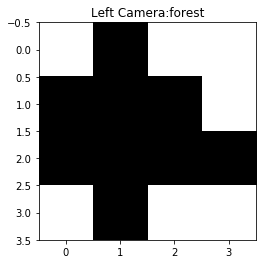

In [19]:
view_sensor_image( clean_data[ "forest"][0])

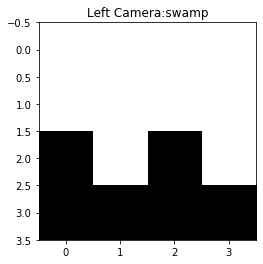

In [20]:
view_sensor_image( clean_data["swamp"][0])

The data that comes in, however, is noisy. The values are never exactly 0 and 1. In order to mimic this we need a `blur` function.

We will assume that noise is normally distributed. For values that should be 0, the noisy values are distributed $N(0.10, 0.05)$. For values should be 1, the noisy values are distributed $N(0.9, 0.10)$.

In [21]:
def blur( data):
    def apply_noise( value):
        if value < 0.5:
            v = random.gauss( 0.10, 0.05)
            if v < 0.0:
                return 0.0
            if v > 0.75:
                return 0.75
            return v
        else:
            v = random.gauss( 0.90, 0.10)
            if v < 0.25:
                return 0.25
            if v > 1.00:
                return 1.00
            return v
    noisy_readings = [apply_noise( v) for v in data[0:-1]]
    return noisy_readings + [data[-1]]

We can see how this affects what the agent *actually* sees.

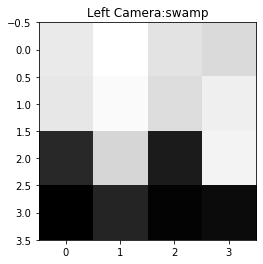

In [22]:
view_sensor_image( blur( clean_data["swamp"][0]))

You are going to want to write three (4) functions:

1. `generate_data`
2. `learn_model`
3. `apply_model`

### `generate_data`

With the clean examples and the `blur` function, we have an unlimited amount of data for training and testing our classifier, an ANN that determines if a sensor image is hills, swamp, forest or plains.

In classification, there is a general problem called the "unbalanced class problem". In general, we want our training data to have the same number of classes for each class. This means you should probably generate training data with, say, 100 of each type.

But what do we do about the class label with the neural network?

In this case, we can do "one hot". Instead of `generate_data` outputing a single 0 or 1, it should output a vector of 0's and 1's so that $y$ is now a vector as well as $x$. We can use the first position for hill, the second for swamp, the third for forest and the fourth for plains:

```
[0, 1, 0, 0]
```

what am I? swamp.

Unlike logistic regression, you should set the *biases* inside the neural network (the implict $x_0$ = 1) because there are going to be lot of them (one for every hidden and output node).

`generate_data` now only needs to take how many you want of each class:

`generate_data( clean_data, 100)`

generates 100 hills, 100 swamp, 100 forest, 100 plains and transforms $y$ into the respective "one hot" encoding.

### `learn_model`

`learn_model` is the function that takes in training data and actually learns the ANN. If you're up to it, you can implement a vectorized version using Numpy but you might start with the loopy version first.

*In the lecture, I mentioned that you usually should mean normalize your data but you don't need to do that in this case because the data is already on the range 0-1.*

You should add a parameter to indicate how many nodes the hidden layer should have.

When verbose is True, you should print out the error so you can see that it is getting smaller.

When developing your algorithm, you need to watch the error so you'll set verbose=True to start. You should print it out every iteration and make sure it is declining. You'll have to experiment with both epsilon and alpha; and it doesn't hurt to make alpha adaptive (if the error increases, make alpha = alpha / 10).

When you know that your algorithm is working, change your code so that the error is printed out only every 1,000 iterations (it takes a lot of iterations for this problem to converge, depending on your parameter values--start early).

`learn_model` returns the neural network. The hidden layer will be one vector of thetas for each hidden node. And the output layer will have its own thetas, one for each output (4 in this case). Return it as a Tuple: (List of List, List of List).

### `apply_model`

`apply_model` takes the ANN (the model) and either labeled or unlabeled data. If the data is unlabeled, it will return predictions for each observation as a List of Tuples of the inferred value (0 or 1) and the actual probability (so something like (1, 0.73) or (0, 0.19) so you have [(0, 0.30), (1, 0.98), (0, 0.87), (0, 0.12)]. Note that unlike the logistic regression, the threshold for 1 is not 0.5 but which value is largest (0.98 in this case).

If the data is labeled, you will return a List of List of Tuples of the actual value (0 or 1) and the predicted value (0 or 1). For a single data point, you'll have the pairs of actual values [(0, 1), (0, 0), (0, 0), (1, 0)] is a misclassification and [(0, 0), (0, 0), (1, 1), (0, 0)] will be a correct classification. Then you have a List of *those*, one for each observation.

###  simple evaluation

We have an "unlimited" supply of data so we'll just generate a training set and then a test set and see how well our neural network does. Use the error rate (correct classifications/total examples) for your evaluation metric. We'll learn about more sophisticated 

1. generate training set (how many do you think you need?)
2. generate test set (how many is a good "test" of the network you built?)
3. loop over [2, 4, 8] hidden nodes:
    1. train model and apply to train data, calculate error rate.
    2. apply to test data and calculate error rate.
    3. print error rate
    
Which number of hidden nodes did best?

**As always when working with Lists or Lists of Lists, be very careful when you are modifying these items in place that this is what you intend (you may want to make a copy first)**

**sigmoid function**

In [23]:
def sigmoid(val):
    """ Function to perform sigmoid

    Args:
        val: the x vals

    Returns: the value of sigmoid(val)

    """
    return 1 / (1 + np.exp(-val))


**delta**

In [24]:
def delta(val):
    """ Calc the value of delta

    Args:
        val: the x vals

    Returns: the the value of delta

    """
    return sigmoid(val) * (1-sigmoid(val))


**calculate_error**

In [25]:
def calculate_error(y_hat, y):
    """ Calculate the error as defined in the pseudo-code provided

    Args:
        y_hat: the y_hat values calculated above
        y: the provided y value

    Returns:
        The value of the error
    """
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

---

Put your helper functions above here.

## Main Functions

Use `generate_data` to generate 10 blurred "hills" examples with balanced (same number of) "non hills" examples to see that the function is working.

In [26]:
def generate_data(clean_data, n, key_label):
    """ Provided generate data function.
    
    A flag had to be added to make sure that 100 "not-hills" were generated instead of 99. 

    Args:
        clean_data: clean data struct above
        n: the number to generate
        key_label: key for our data

    Returns:
        Generated test data

    """
    labels = set(clean_data.keys())
    labels.remove(key_label)

    total_per_label = int(n/len(labels))
    data = []
    # create n "not label" and code as y=0
    one_more=True
    for label in labels:
        for _ in range(total_per_label):
            if(one_more):
                datum = blur(random.choice(clean_data[label]))
                xs = datum[0:-1]
                data.append((xs, 0))
                one_more=False
            datum = blur(random.choice(clean_data[label]))
            xs = datum[0:-1]
            data.append((xs, 0))
    # create n "label" and code as y=1
    for _ in range(n):
        datum = blur(random.choice(clean_data[key_label]))
        xs = datum[0:-1]
        data.append((xs, 1))
    random.shuffle(data)
    return data


results = generate_data( clean_data, 10, "hills")
for result in results:
    print(result)

([0.02897821471660114, 1.0, 0.07059691753091583, 0.10146701789969735, 0.922170421612891, 0.8321908757073053, 0.982749912283082, 0.1426702829867197, 0.8173843094142658, 1.0, 0.8422365500052493, 0.8836330132842193, 0.15317604130747983, 0.6910180873592441, 0.09887272503144168, 0.17070258814120287], 0)
([0.0, 0.17403501068778765, 0.04211871300282971, 0.16453946572682643, 0.1159679851394105, 0.9597942586162987, 0.18571836964063015, 0.09814046559730934, 1.0, 0.7930414551947407, 0.9486440050781866, 0.08295925695331938, 0.990080409443274, 0.8704097273302557, 0.8226396001637115, 0.9704345013721931], 1)
([0.15672973656969316, 0.13335356023719208, 0.12275529345658742, 0.8522838790895074, 0.03882941682400869, 0.038615852665737055, 0.83752219769892, 0.8573571477566129, 0.1576986061152171, 0.8847986380979713, 0.8798313518894532, 1.0, 0.1417394725075505, 0.004784091612770394, 0.09628337857497718, 1.0], 0)
([0.17440829832111082, 0.062324889460287886, 0.04830108345646172, 0.1922304323139889, 0.14450188

Use `learn_model` to learn a ANN model for classifying sensor images as hills, swamps, plains or forest. Use your `generate_data` function to generate a training set with 100 examples for each. **Set Verbose to True**

**My learn_model function does not calculate the error correctly (I was having some numpy issues) and therefore it does not generate the correct solution. I believe that I have all of the forward and backpropagation implemented correctly however.**

In [27]:

def learn_model( data, verbose=False):
    """ Function to create a model of the thetas as defined by the provided pseudocode.

    Args:
        data: The generated data
        verbose: Flag to enable verbose debug info

    Returns:
        A list of thetas
    """

    X, y = zip(*data)
    X = list(X)
    y = np.array(list(y))
    X = np.concatenate((np.ones((len(X), 1)), X), axis=1)  # insert x0 into x list

    hidden_thetas = np.random.rand(len(X[0]), 4)
    output_thetas = np.random.rand(4, 1)

    i = 0
    current_error = 1
    previous_error = 0
    while abs(current_error - previous_error) > 0.0000001:
        hidden_y_hat = np.dot(X, hidden_thetas)
        hidden_theta = sigmoid(hidden_y_hat)

        output_y_hat = np.dot(hidden_theta, output_thetas)
        output_theta = sigmoid(output_y_hat)

        output_sums = output_theta - y.reshape(200, 1)
        output_delta = delta(output_y_hat)

        hidden_cost = np.dot(hidden_theta.T, output_sums * output_delta)

        # backprop
        output_costs = np.dot(X.T, delta(hidden_y_hat) * np.dot(output_sums * output_delta, output_thetas.T))

        # apply alpha to the thetas
        output_thetas -= 0.1 * output_costs
        hidden_thetas -= 0.1 * hidden_cost

        previous_error = current_error
        current_error = calculate_error(np.hstack(output_sums), y)

        if verbose or i % 1000 == 0:
            print(f'Iteration {i} current error={current_error}')
        i += 1
    return output_thetas
train_data = generate_data( clean_data, 100, "hills")
model = learn_model( train_data, False)
test_data = generate_data(clean_data, 100, "hills")
x_test, y_test = zip(*train_data)

ValueError: operands could not be broadcast together with shapes (4,1) (17,4) (4,1) 

Use `generate_data` to generate 100 blurred examples of each terrain and use this as your test data. Print out the first 10 results, one per line.

In [ ]:
test_data = generate_data( clean_data, 100, "hills")

def apply_model(model, test_data):
    """ Function that applies the model of hills that was learned in "learn_model"

    Args:
        model: The provided model
        test_data: The generated test data

    Returns:
        Returns a model of the hill data
    """
    
    # insert x0 into x list
    test_data = np.concatenate((np.ones((len(test_data), 1)), test_data), axis=1)
    return sigmoid(np.dot(test_data, model)).round()

x_test, y_test = zip(*test_data)
results = apply_model( model, list(x_test))
print('First ten results...')
for i in range(10):
    print(f'Predicted:{results[i]} Actual:{y_test[i]}')


Now that you're pretty sure your algorithm works (the error rate during training is going down, and you can evaluate `apply_model` results for its error rate) then figure out if 2, 4, or 8 hidden nodes is best:

In [ ]:
def error_rate(actual, predicted):
    """ Function to print the confusion matrix and error rate for the actual vs predicted

    Args:
        actual: The generated test data of hills and not-hills.
        predicted: The predictions of hills based on our model.
    """
    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0
    for i in range(len(y_test)):
        if actual[i] == 1 and int(predicted[i]) == 1:
            true_positive += 1
        elif actual[i] == 0 and int(predicted[i]) == 1:
            false_positive += 1
        elif actual[i] == 0 and int(predicted[i]) == 0:
            true_negative += 1
        elif actual[i] == 1 and int(predicted[i]) == 0:
            false_negative += 1
    print(f'True Positives:{true_positive}')
    print(f'False Positives:{false_positive}')
    print(f'True Negatives:{true_negative}')
    print(f'False Negatives:{false_negative}')
    print(f'Error Rate: {(false_negative + false_positive) / len(y_test)}')
error_rate(y_test, results)

which number of hidden nodes is best? ____
**My Understanding is that there would be a "sweet spot" for the number of nodes, where too many nodes would cause overfitting and too few would have the opposite problem.**